In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 12.0]

In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [4]:
from pandas_summary import DataFrameSummary

In [5]:
# import my Finance Analysis Tools (fat)
import finance as fat

## Load daily data

In [6]:
ticker = 'IAU'
daily = fat.get_price_data(ticker)

Loaded data for IAU: 2005-01-28 to 2018-02-16.


In [7]:
daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-12,12.66,12.74,12.66,12.68,12.68,11623200
2018-02-13,12.74,12.77,12.70,12.76,12.76,8174100
2018-02-14,12.80,13.02,12.78,12.98,12.98,19514800
2018-02-15,13.01,13.02,12.95,12.99,12.99,13914600
2018-02-16,12.98,13.03,12.92,12.95,12.95,13611800


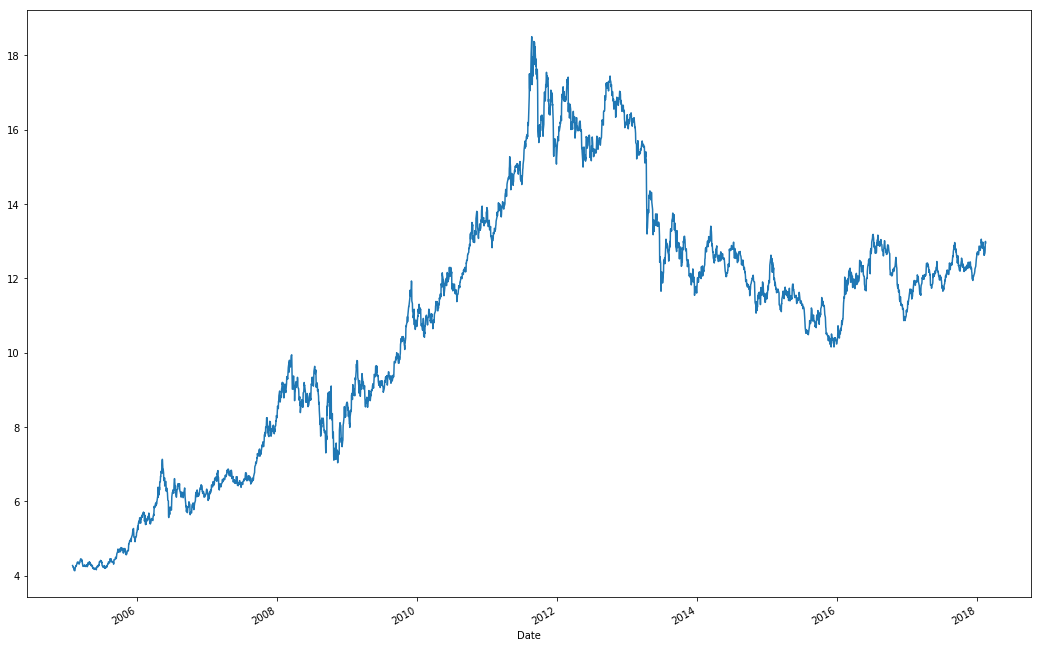

In [8]:
daily['Adj Close'].dropna().plot()

## Resample to Weekly

In [9]:
weekly = DataFrame(daily.resample('W', loffset=pd.offsets.timedelta(days=-7)).mean()['Adj Close'])

In [10]:
weekly.tail()

,Adj Close
Date,
2018-01-14,12.790
2018-01-21,12.930
2018-01-28,12.880
2018-02-04,12.688
2018-02-11,12.872


In [24]:
path = f'data/google/{ticker}-weekly-mean_close.csv'
weekly['Adj Close'].to_csv(path)

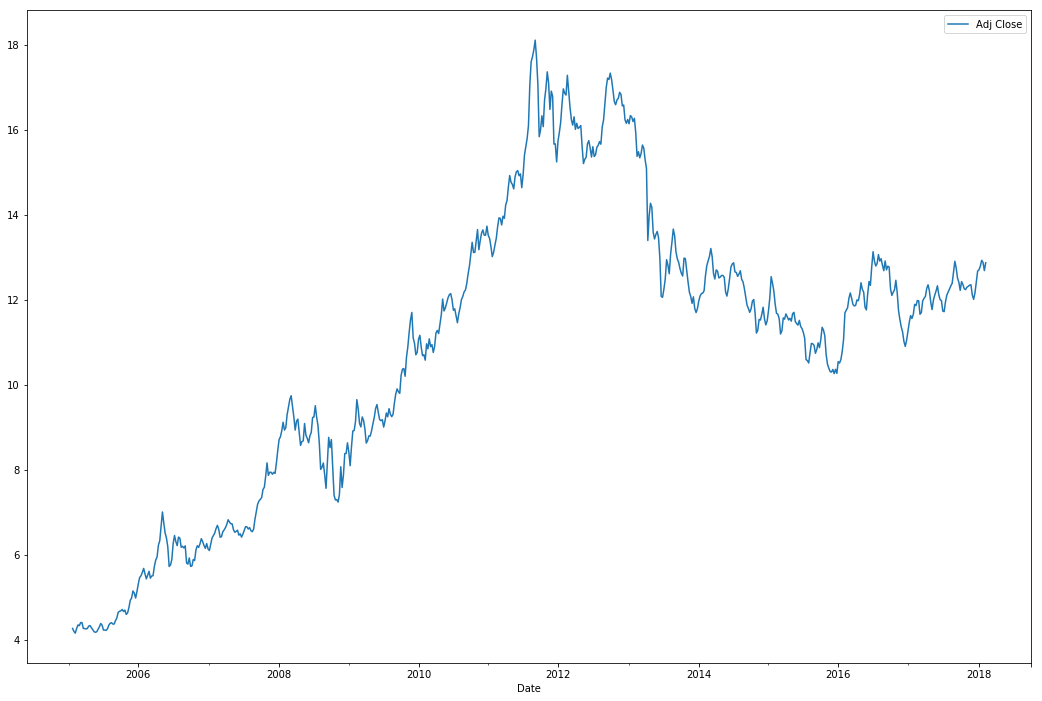

In [12]:
weekly.plot()

In [13]:
negative_weekly = -weekly

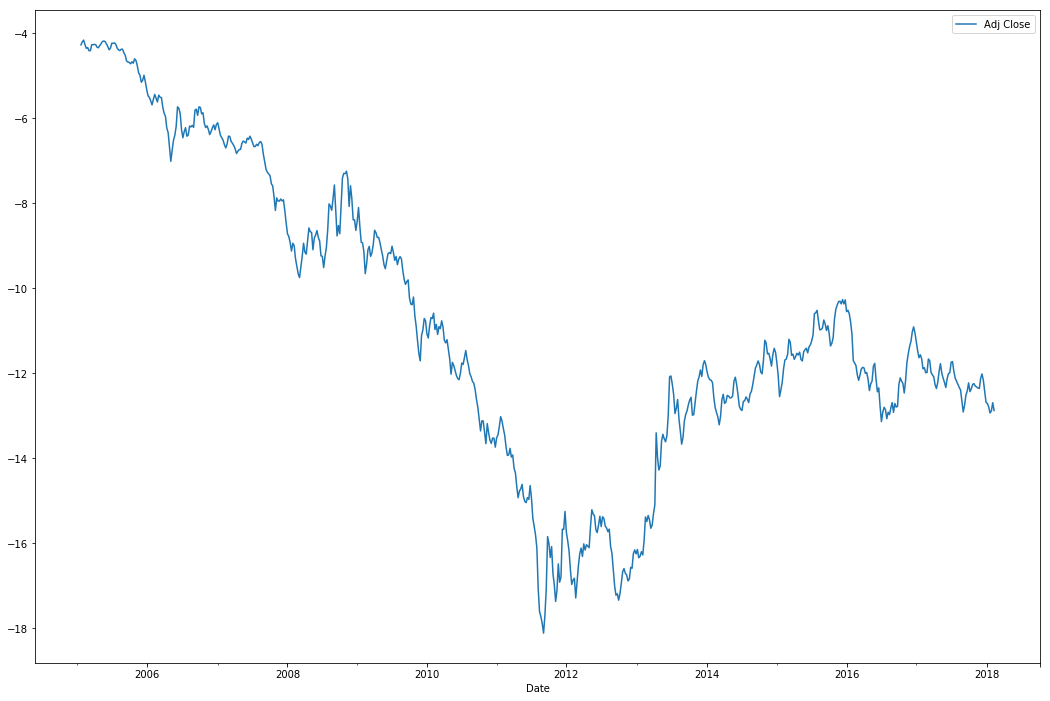

In [14]:
negative_weekly.plot()

In [23]:
path = f'data/google/{ticker}-negative-weekly-mean_close.csv'
negative_weekly['Adj Close'].to_csv(path)

## Get %diff with respect to SMA200

In [17]:
weekly_pct_diff_sma200 = fat.get_sma_pct_diff_df(weekly, 'Adj Close', [200]).dropna()
del weekly_pct_diff_sma200['Adj Close']

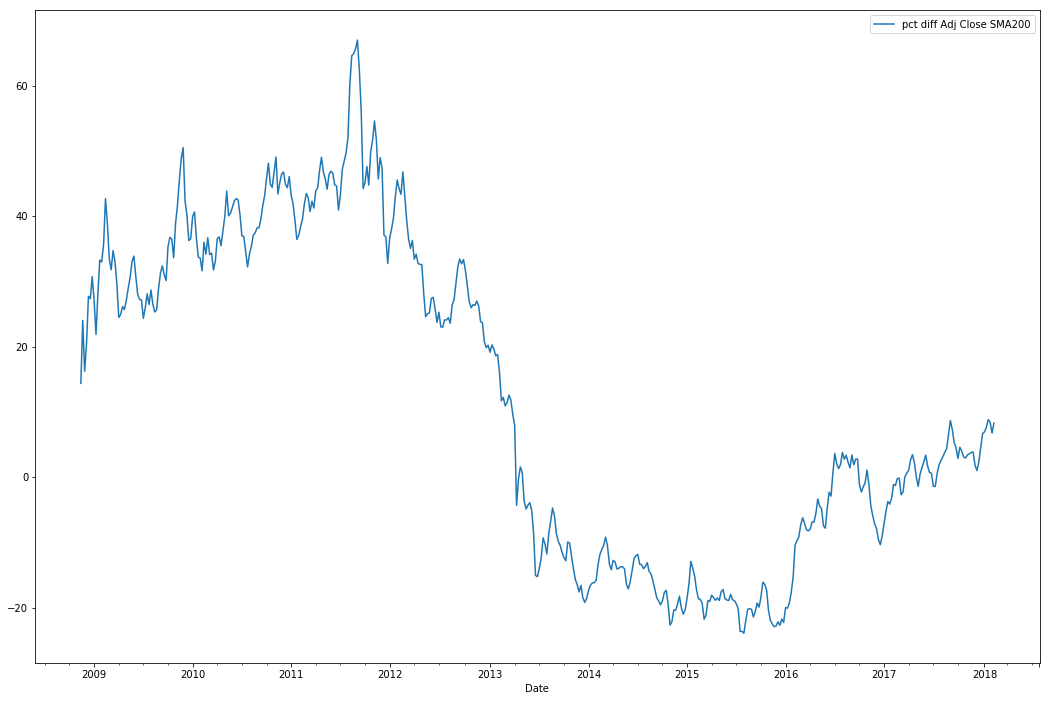

In [18]:
weekly_pct_diff_sma200.plot()

In [19]:
path = f'data/google/{ticker}-weekly-pct_diff_sma200_mean_close.csv'
weekly_pct_diff_sma200['pct diff Adj Close SMA200'].to_csv(path)

In [22]:
negative_weekly_pct_diff_sma200 = -weekly_pct_diff_sma200
path = f'data/google/{ticker}-negative-weekly-pct_diff_sma200_mean_close.csv'
negative_weekly_pct_diff_sma200['pct diff Adj Close SMA200'].to_csv(path)

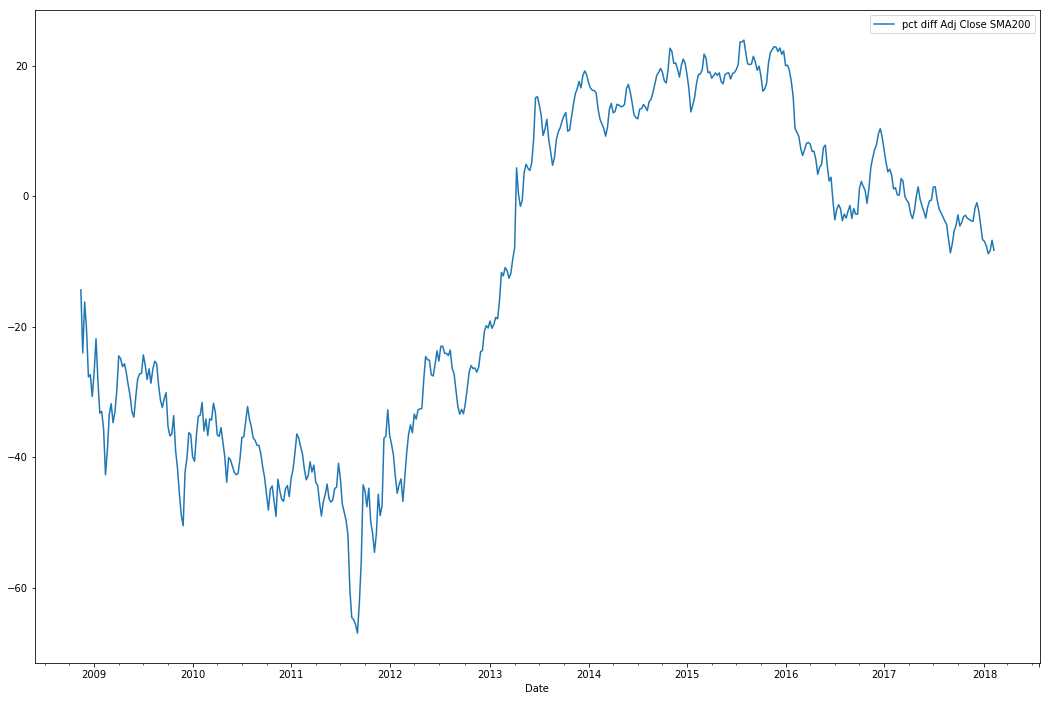

In [21]:
negative_weekly_pct_diff_sma200.plot()